# Matplotlib bar chart storytelling

In [1]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [ ]:
df_quantity_brand = duckdb.query("""
    SELECT 
        make AS Brand,
        SUM(quantity) AS Quantity           
    FROM df
    GROUP BY Brand
    ORDER BY quantity DESC
           
""").df().set_index("Brand")

df_quantity_brand

# Bar charts

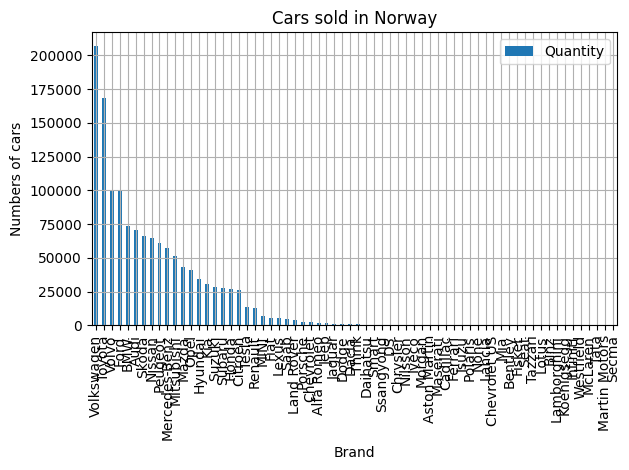

In [6]:
ax = df_quantity_brand.plot(kind = "bar", title = "Cars sold in Norway", ylabel = "Numbers of cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/0_bar_initial.png")

In [8]:
df_quantity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


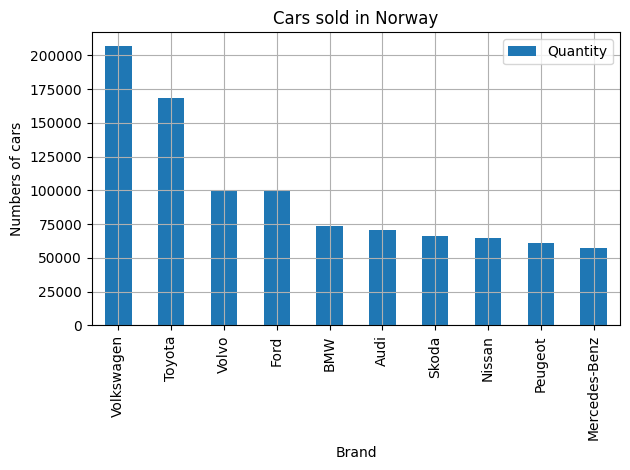

In [47]:
ax = df_quantity_brand.iloc[:10].plot(kind = "bar", title = "Cars sold in Norway", ylabel = "Numbers of cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/1_bar_initial.png")

# apply data storytelling

- remove clutter
- contrast
- color sparingly
- descriptive title and label
- positioning title and label
- proximity principle with amotation
- percentage instead of absolute values
- horizontal bar

In [16]:
# percentage

df_percentage = df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100
df_percentage

Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
Westfield         0.000074
McLaren           0.000074
Tata              0.000074
Martin Motors     0.000074
Secma             0.000074
Name: Quantity, Length: 66, dtype: float64

In [35]:
df_percentage_top10 = df_percentage.iloc[:10]
colors = [GRAY_1]*len(df_percentage_top10)
colors[2] = BLUE_1
colors

['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


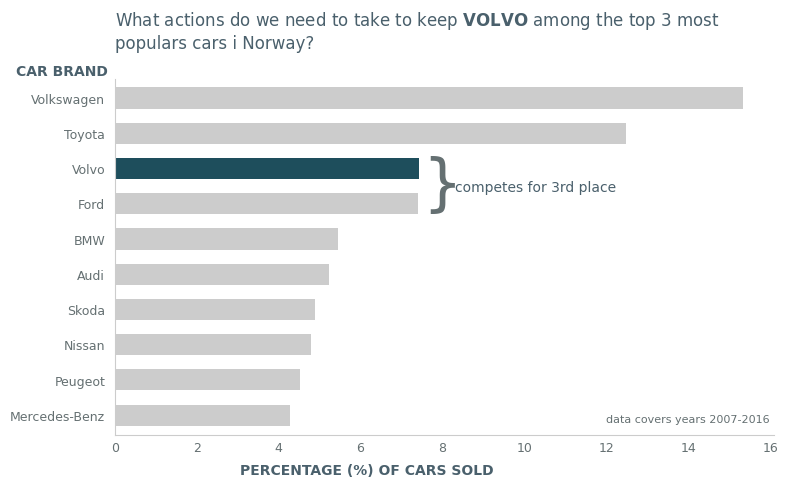

In [55]:
# horizontal bar chart

ax = df_percentage.iloc[:10].plot(kind = "barh", ylabel = "Numbers of cars", figsize = (8,5), width = .6, color = colors)

ax.invert_yaxis()

# remove clutter
ax.spines[["top", "right"]].set_visible(False)

# contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis = "both", colors = GRAY_2, labelsize = 9, length = 0, pad = 5)
ax.tick_params(axis = "y", pad = 7)

# descriptive titles and labels - call to action (CTA)
# LaTex mode på volvo
ax.set_title("What actions do we need to take to keep " + r"$\bf{VOLVO}$" + " among the top 3 most \npopulars cars i Norway?", loc = "left", color = GRAY_3, pad = 22)

ax.set_xlabel("PERCENTAGE (%) OF CARS SOLD", color = GRAY_3, fontweight = "bold", loc = "left")
ax.set_ylabel("CAR BRAND", color = GRAY_3, fontweight = "bold", rotation = 0)

# annotations - proximity principle 
ax.xaxis.set_label_coords(0.19, -0.08)
ax.yaxis.set_label_coords(-0.08, 1)

ax.annotate(xy=(7.5, 2.97), text="}", fontsize=45, family="Times", color=GRAY_2)

ax.annotate(
    xy=(8.3, 2.65),
    text="competes for 3rd place",
    fontsize=10,
    color=GRAY_3,
)

ax.annotate(
    xy=(12, 9.2),
    text="data covers years 2007-2016",
    fontsize=8,
    color=GRAY_2,
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/2_bar_initial.png")

In [22]:
help(ax.spines)

Help on Spines in module matplotlib.spines object:

class Spines(collections.abc.MutableMapping)
 |  Spines(**kwargs)
 |
 |  The container of all `.Spine`\s in an Axes.
 |
 |  The interface is dict-like mapping names (e.g. 'left') to `.Spine` objects.
 |  Additionally, it implements some pandas.Series-like features like accessing
 |  elements by attribute::
 |
 |      spines['top'].set_visible(False)
 |      spines.top.set_visible(False)
 |
 |  Multiple spines can be addressed simultaneously by passing a list::
 |
 |      spines[['top', 'right']].set_visible(False)
 |
 |  Use an open slice to address all spines::
 |
 |      spines[:].set_visible(False)
 |
 |  The latter two indexing methods will return a `SpinesProxy` that broadcasts all
 |  ``set_*()`` and ``set()`` calls to its members, but cannot be used for any other
 |  operation.
 |
 |  Method resolution order:
 |      Spines
 |      collections.abc.MutableMapping
 |      collections.abc.Mapping
 |      collections.abc.Collection